In [2]:
import cv
import glob
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt

In [9]:
'''for c in random.sample(glob.glob("C:/Users/kopal/documents//*"),50):
    shutil.move(c , "train/positive")
for c in random.sample(glob.glob("C:/Users/kopal/Data mining/Non-COVID-19/*"),50):
    shutil.move(c ,"train/negative")
for c in random.sample(glob.glob("C:/Users/kopal/Data mining/COVID-19/*"),50):
    shutil.move(c ,"test/positive")
for c in random.sample(glob.glob("C:/Users/kopal/Data mining/Non-COVID-19/*"),):
    shutil.move(c ,"test/negative")'''
    
for i in range(1,10):
    if str(i) not in os.listdir(os.getcwd()+"/train"):
        os.mkdir("train/{x}".format(x=i))
    if str(i) not in os.listdir(os.getcwd()+"/test"):
        os.mkdir("test/{x}".format(x=i))
    for c in random.sample(glob.glob(os.getcwd()+"/WMCA small set/train/bonafied/b_00{x}*".format(x=i)),50):
        shutil.move(c , "train/{x}".format(x=i))
    for c in random.sample(glob.glob(os.getcwd()+"/WMCA small set/train/bonafied/b_00{x}*".format(x=i)),10):
        shutil.move(c , "test/{x}".format(x=i))
    

In [8]:
for i in range(1,10):
    print(len([x for x in os.listdir(os.getcwd() + "/WMCA small set/train/bonafied") if "b_00{y}".format(y=i) in x]))

200
450
250
200
400
200
400
400
70


In [10]:
def detect_face(img):
    #convert the test image to gray scale as opencv face detector expects gray images
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

    #let's detect multiscale images(some images may be closer to camera than others)
    #result is a list of faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);

    #if no faces are detected then return original img
    if (len(faces) == 0):
        return None, None

    #under the assumption that there will be only one face,
    #extract the face area
    (x, y, w, h) = faces[0]

    #return only the face part of the image
    return gray[y:y+w, x:x+h], faces[0]

In [11]:
def prepare_training_data(data_folder_path):
 
    #------STEP-1--------
    #get the directories (one directory for each subject) in data folder
    dirs = os.listdir(data_folder_path)

    #list to hold all subject faces
    faces = []
    #list to hold labels for all subjects
    labels = []

    #let's go through each directory and read images within it
    for dir_name in dirs:

        #------STEP-2--------
        #extract label number of subject from dir_name
        #format of dir name = slabel
        #, so removing letter 's' from dir_name will give us label
        label = int(dir_name)

        #build path of directory containing images for current subject subject
        #sample subject_dir_path = "training-data/s1"
        subject_dir_path = data_folder_path + "/" + dir_name

        #get the images names that are inside the given subject directory
        subject_images_names = os.listdir(subject_dir_path)
        print(len(subject_images_names))

        #------STEP-3--------
        #go through each image name, read image, 
        #detect face and add face to list of faces
        for image_name in subject_images_names:
            #build image path
            #sample image path = training-data/s1/1.pgm
            image_path = subject_dir_path + "/" + image_name

            #read image
            image = cv2.imread(image_path)

            #display an image window to show the image 
            cv2.imshow("Training on image...", image)
            cv2.waitKey(100)

            #detect face
            face, rect = detect_face(image)

            #------STEP-4--------
            #for the purpose of this tutorial
            #we will ignore faces that are not detected
            if face is not None:
                #add face to list of faces
                faces.append(face)
                #add label for this face
                labels.append(label)
            else:
                print("face not found")
                plt.imshow(image)
                plt.show()

        cv2.destroyAllWindows()
        
    cv2.waitKey(1)
    cv2.destroyAllWindows()

    return faces, labels

Preparing data...
50
face not found


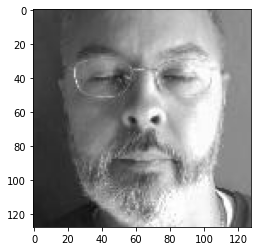

50
face not found


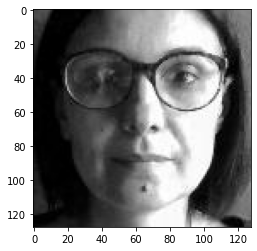

face not found


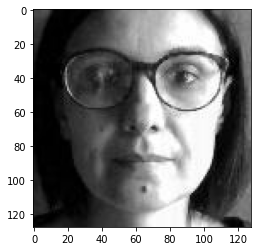

face not found


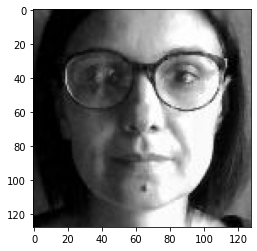

face not found


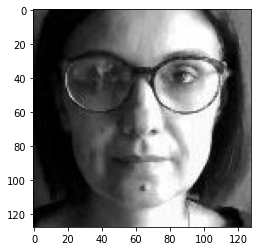

face not found


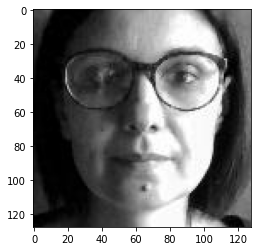

face not found


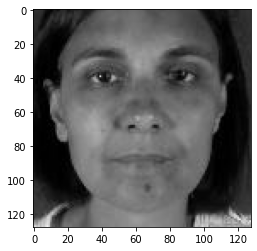

face not found


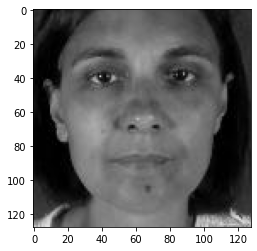

face not found


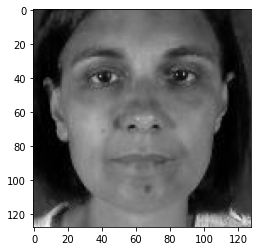

face not found


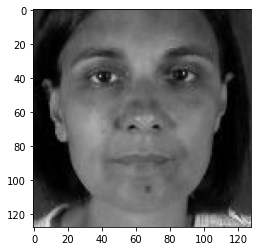

face not found


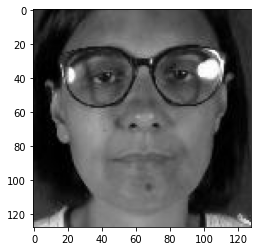

face not found


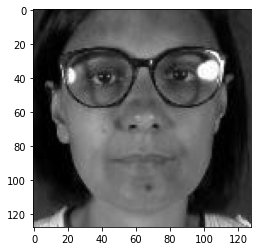

face not found


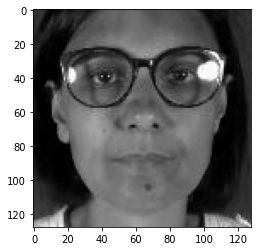

face not found


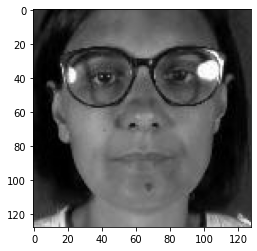

face not found


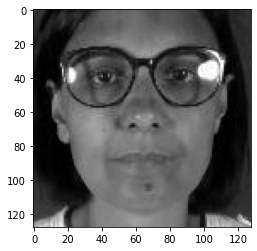

50
50
face not found


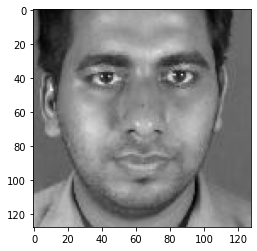

face not found


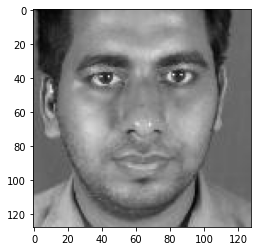

face not found


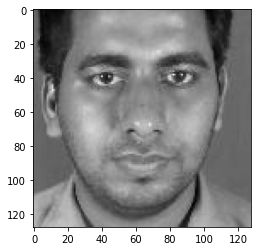

face not found


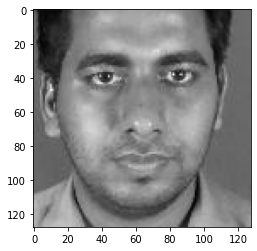

face not found


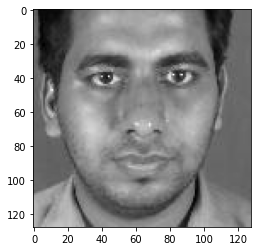

face not found


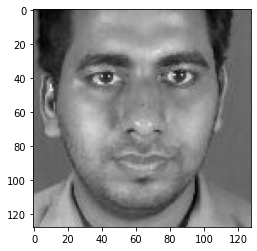

face not found


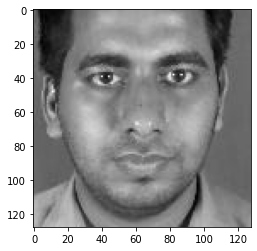

50
face not found


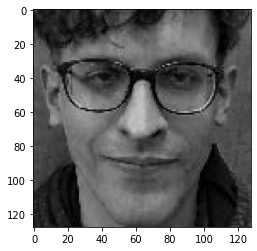

face not found


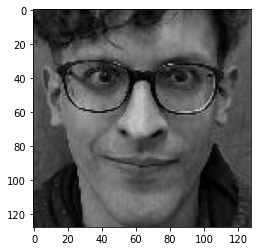

face not found


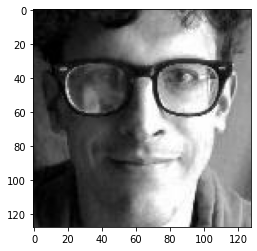

face not found


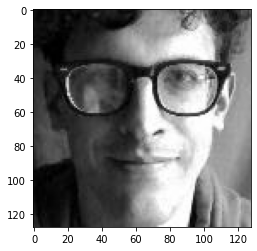

face not found


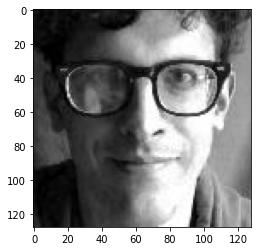

face not found


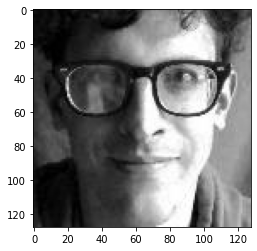

face not found


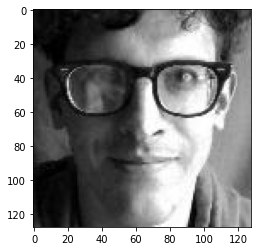

face not found


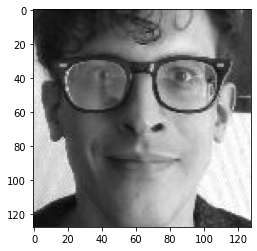

face not found


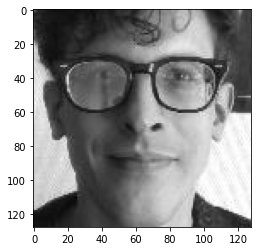

face not found


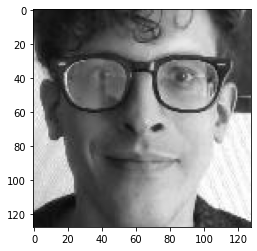

face not found


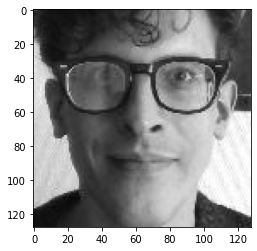

face not found


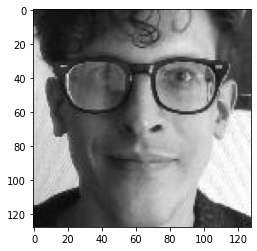

face not found


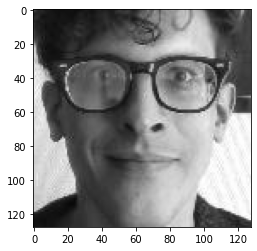

face not found


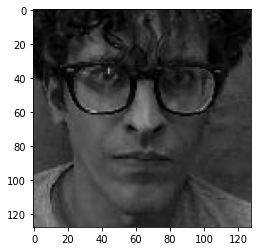

face not found


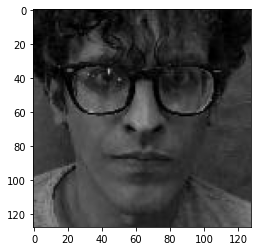

face not found


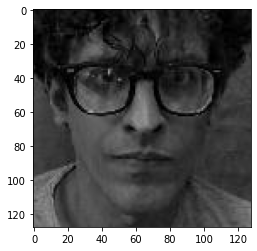

face not found


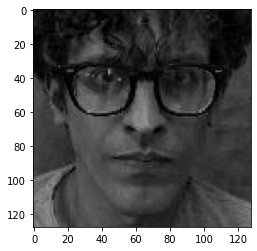

face not found


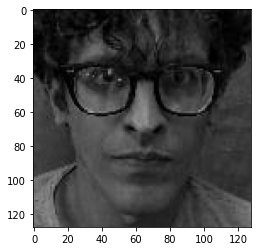

face not found


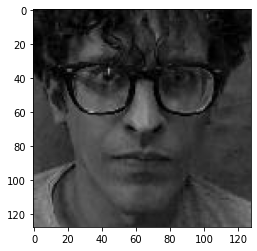

face not found


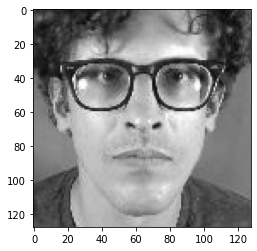

face not found


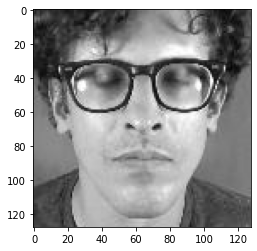

face not found


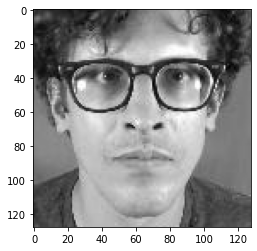

face not found


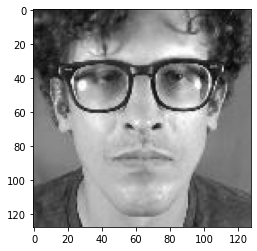

face not found


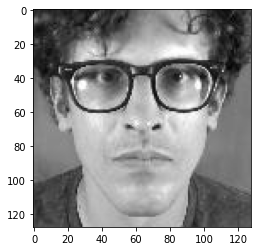

face not found


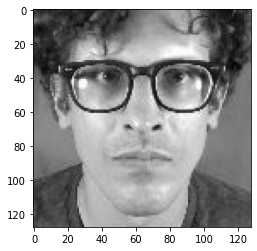

face not found


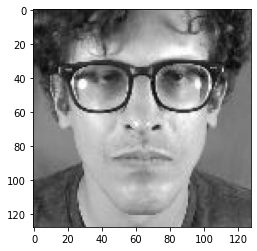

face not found


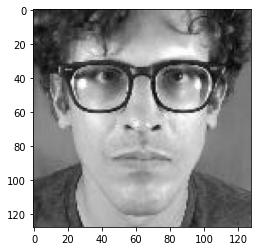

face not found


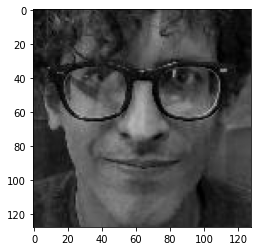

face not found


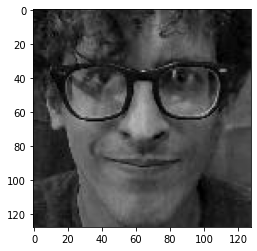

face not found


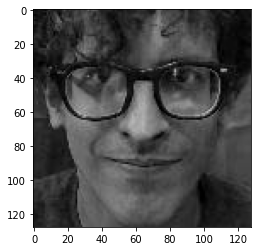

face not found


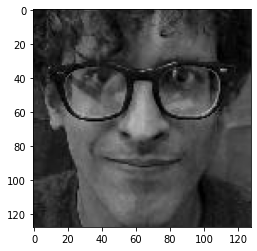

face not found


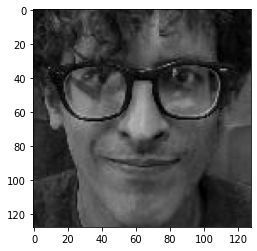

face not found


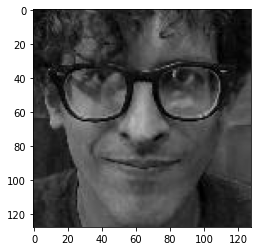

face not found


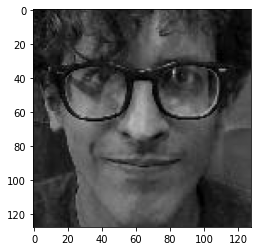

50
face not found


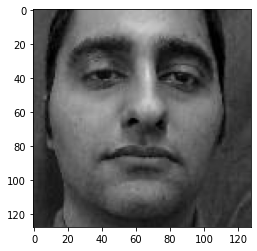

face not found


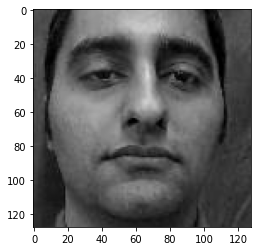

face not found


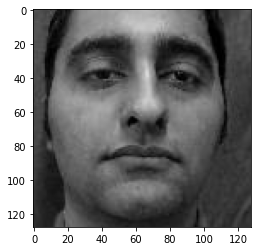

face not found


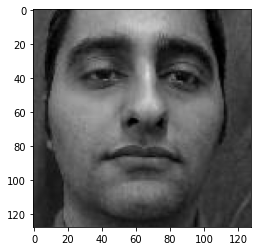

face not found


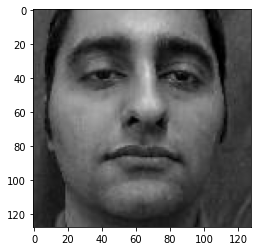

face not found


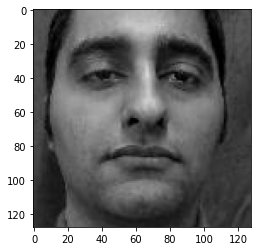

face not found


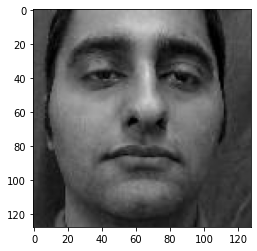

face not found


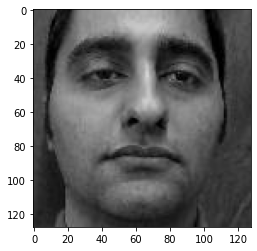

face not found


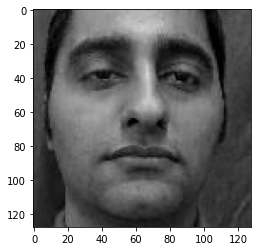

face not found


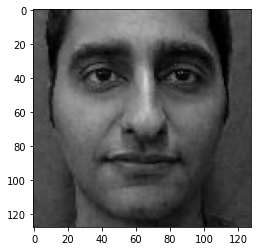

face not found


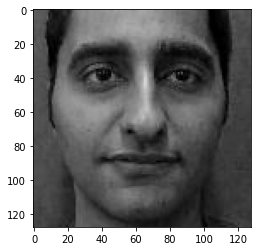

face not found


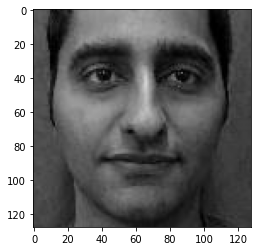

face not found


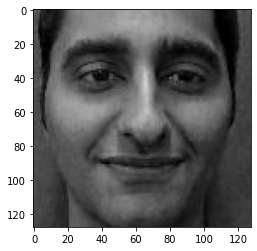

face not found


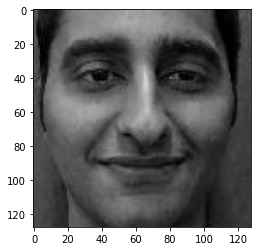

face not found


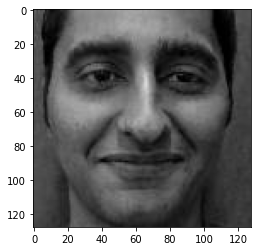

face not found


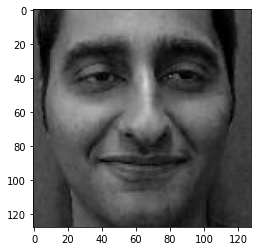

face not found


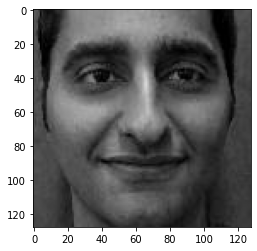

face not found


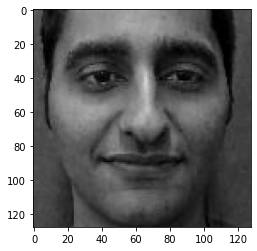

face not found


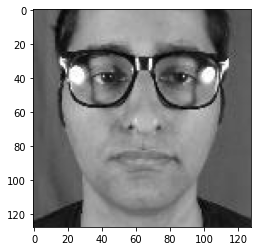

face not found


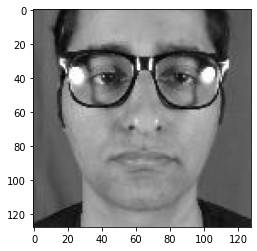

face not found


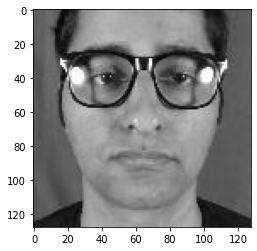

face not found


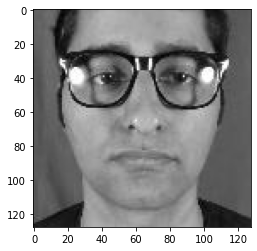

face not found


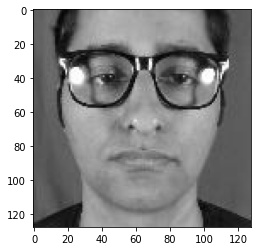

face not found


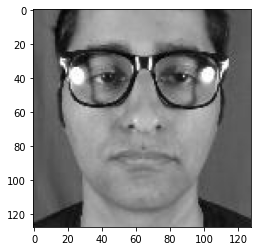

face not found


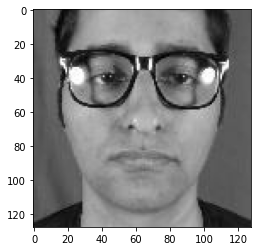

face not found


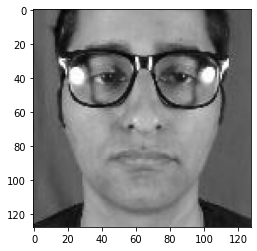

face not found


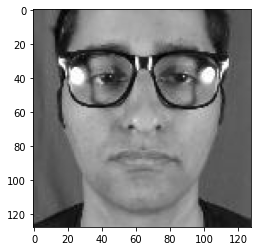

face not found


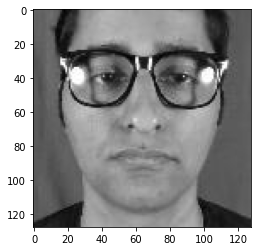

face not found


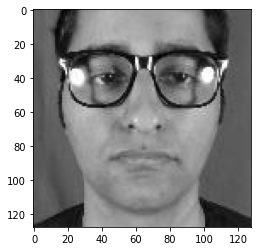

face not found


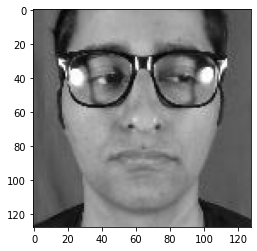

face not found


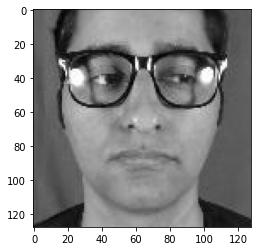

face not found


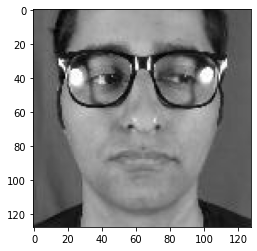

face not found


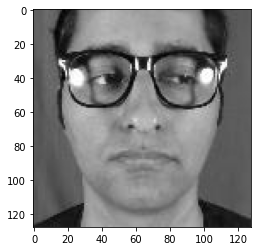

face not found


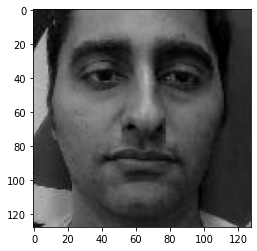

face not found


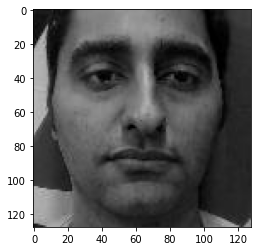

face not found


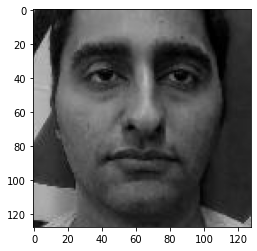

face not found


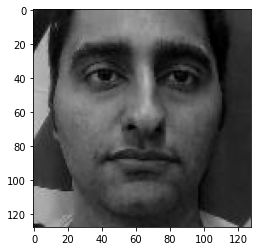

face not found


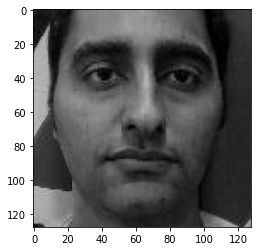

face not found


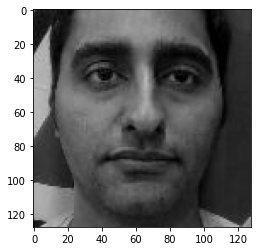

50
face not found


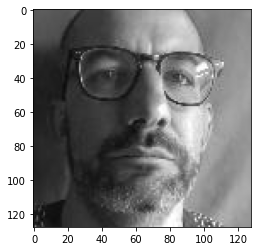

face not found


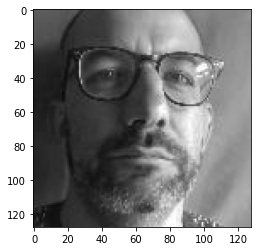

face not found


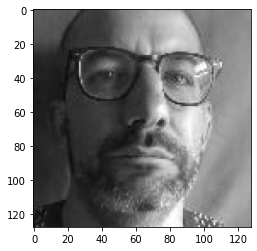

face not found


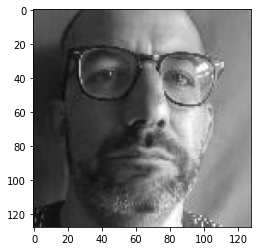

face not found


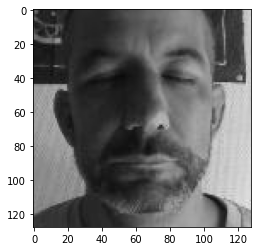

face not found


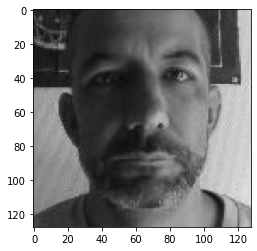

face not found


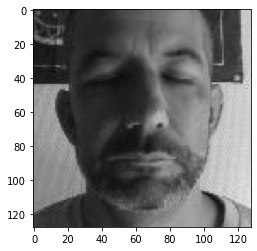

face not found


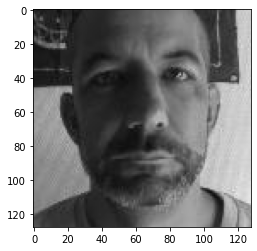

face not found


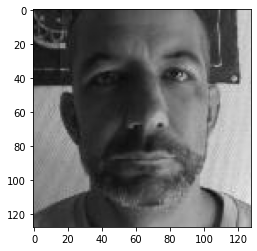

face not found


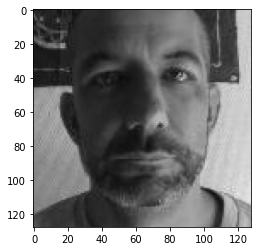

face not found


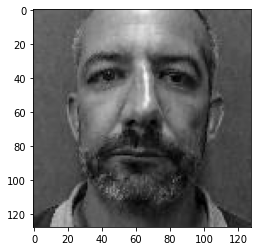

face not found


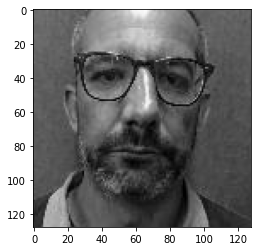

face not found


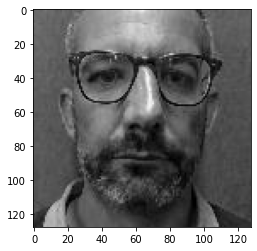

face not found


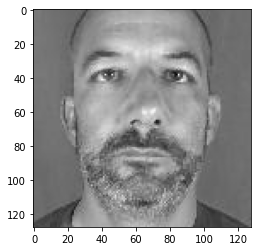

face not found


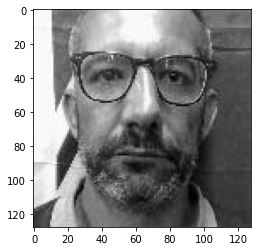

50
face not found


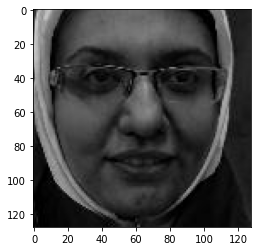

face not found


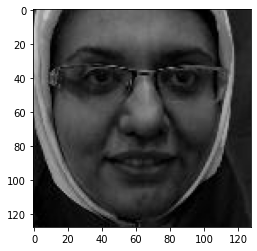

face not found


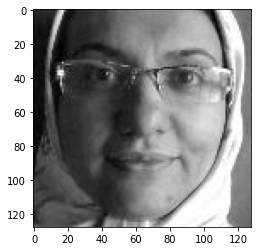

face not found


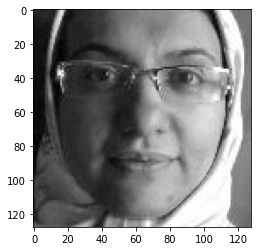

face not found


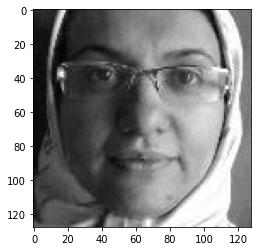

face not found


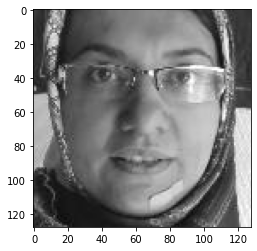

face not found


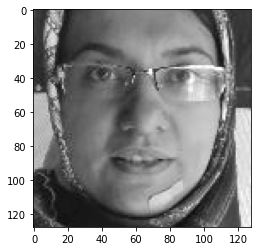

face not found


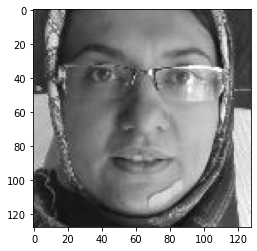

face not found


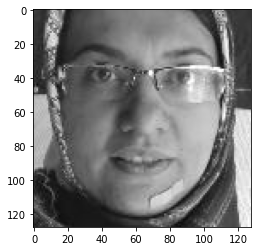

face not found


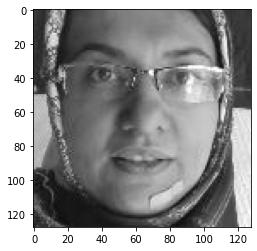

face not found


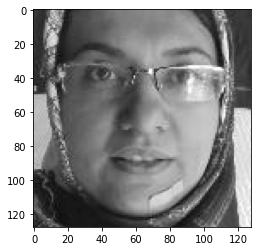

face not found


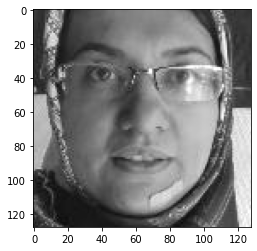

face not found


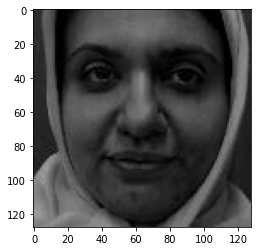

face not found


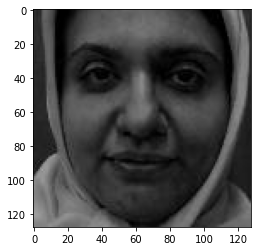

face not found


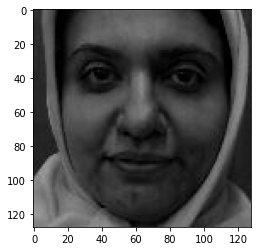

face not found


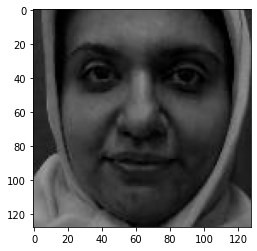

face not found


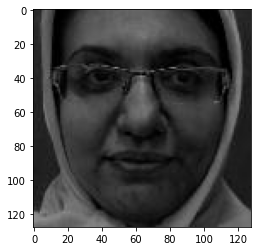

face not found


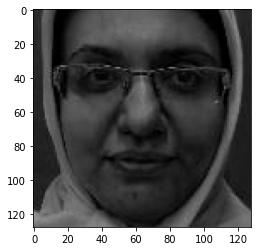

face not found


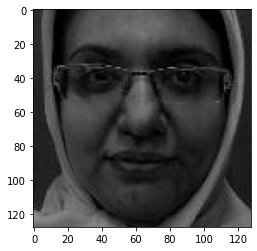

face not found


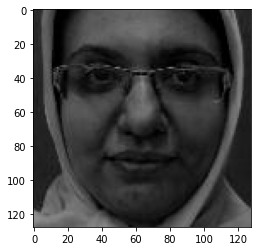

face not found


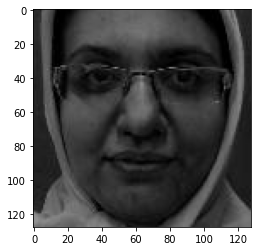

face not found


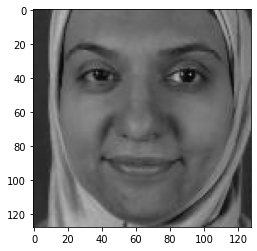

face not found


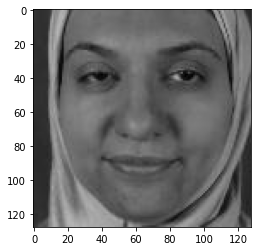

face not found


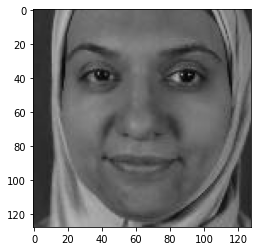

face not found


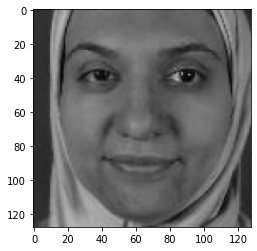

face not found


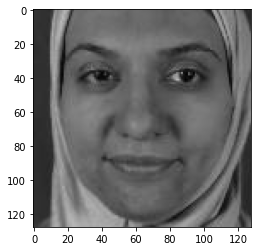

face not found


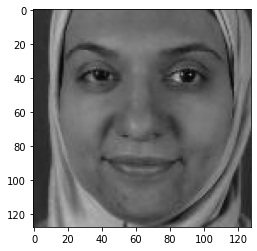

face not found


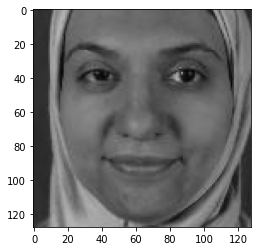

face not found


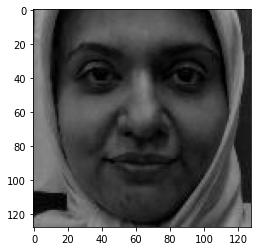

face not found


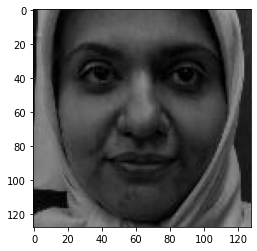

face not found


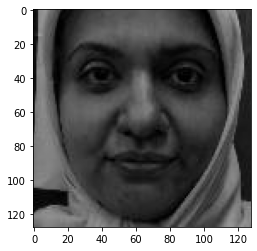

face not found


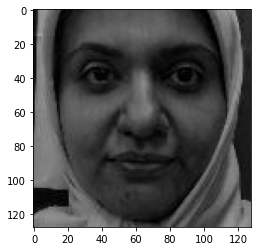

50
face not found


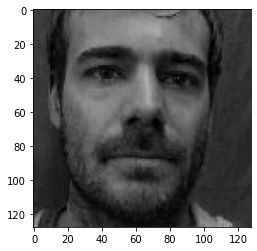

face not found


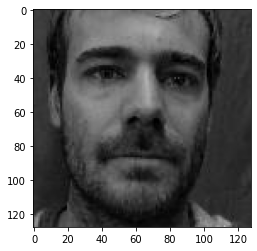

face not found


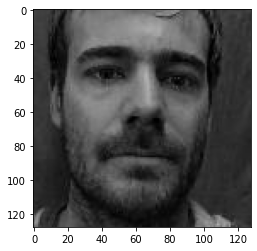

face not found


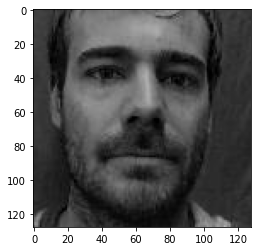

face not found


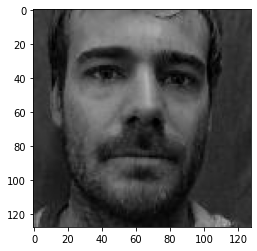

face not found


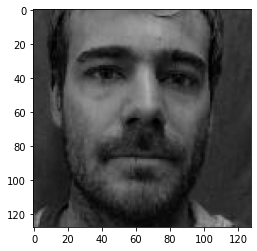

face not found


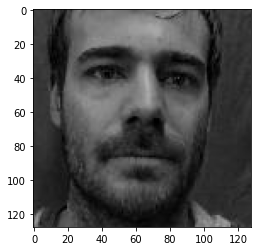

face not found


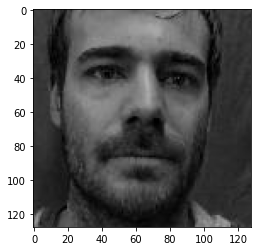

face not found


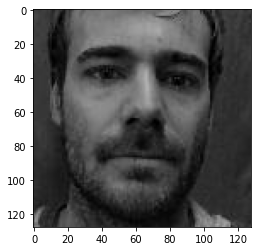

face not found


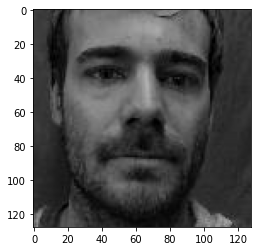

face not found


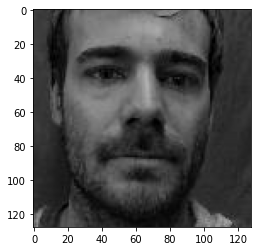

face not found


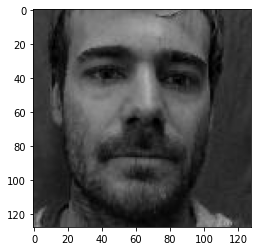

face not found


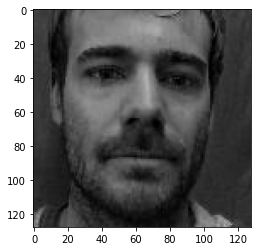

face not found


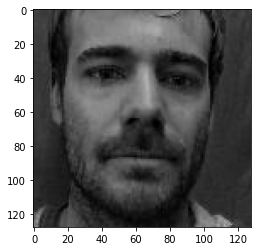

face not found


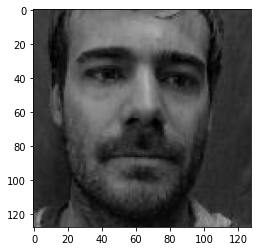

face not found


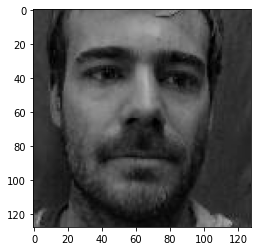

face not found


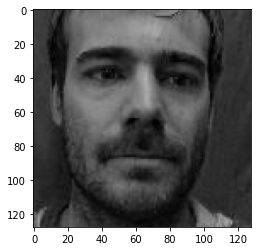

face not found


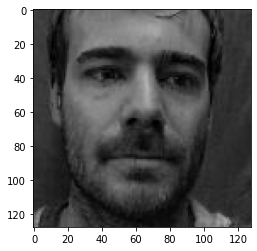

face not found


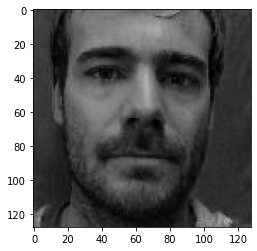

face not found


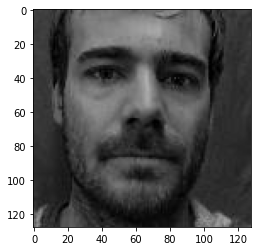

face not found


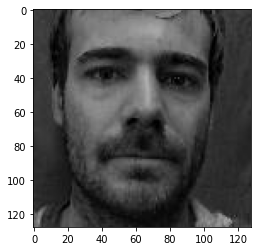

face not found


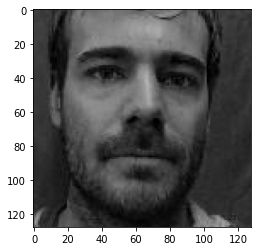

face not found


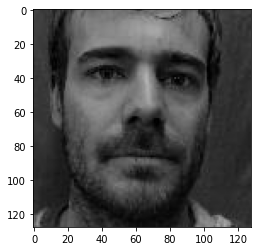

face not found


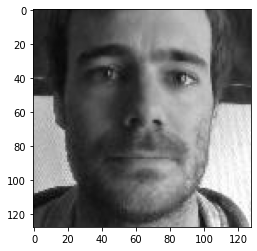

face not found


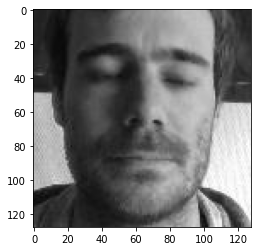

Data prepared


In [12]:
print("Preparing data...")
faces, labels = prepare_training_data("train")
print("Data prepared")

In [93]:
for i in range(1,10):
    print(len([x for x in labels if x==i]))

50
40
50
44
18
12
28
14
26


In [3]:
#create our LBPH face recognizer 
face_recognizer = cv.face.createLBPHFaceRecognizer_create()

#or use EigenFaceRecognizer by replacing above line with 
#face_recognizer = cv2.face.createEigenFaceRecognizer()

#or use FisherFaceRecognizer by replacing above line with 
#face_recognizer = cv2.face.createFisherFaceRecognizer()

face_recognizer.train(faces, np.array(labels))

You should consider upgrading via the 'c:\users\kopal\anaconda3\python.exe -m pip install --upgrade pip' command.


AttributeError: module 'cv' has no attribute 'face'

In [ ]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
 
#function to draw text on give image starting from
#passed (x, y) coordinates. 
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)
    
def predict(test_img):
    #make a copy of the image as we don't want to change original image
    img = test_img.copy()
    #detect face from the image
    face, rect = detect_face(img)

    #predict the image using our face recognizer
    if face is not None:
        label = face_recognizer.predict(face)
        #get name of respective label returned by face recognizer
        label_text = subjects[label]

        #draw a rectangle around face detected
        draw_rectangle(img, rect)
        #draw name of predicted person
        draw_text(img, label_text, rect[0]+2, rect[1]+2)
        print(label_text)
    else:
        print('face not found')

    return img

print("Predicting images...")

#load test images
for i in range(1,10):
    for c in glob.glob("test/{x}/*".format(x=i)):
        predicted = predict(cv2.imread(c))
        cv2.imshow(predicted)
        cv2.waitKey(0)

#perform a prediction
'''predicted_img1 = predict(test_img1)
predicted_img2 = predict(test_img2)'''
print("Prediction complete")


cv2.destroyAllWindows()


In [7]:
'''original
200
450
250
200
400
200
400
400
70'''

#restore
for c in glob.glob("train/*/*"):
    shutil.move(c, "WMCA small set/train/bonafied")
for c in glob.glob("test/*/*"):
    shutil.move(c, "WMCA small set/train/bonafied")

In [70]:
os.getcwd()

'C:\\Users\\kopal\\Documents\\cv_project'

In [108]:
type(None)

NoneType

In [18]:
print(help(cv2.face))

AttributeError: module 'cv2.cv2' has no attribute 'face'